FINAL MACHINE LEARNING PROJECT(INTERNSHALA)

IMPORTING LIBRERY

In [1]:
#importing all required library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing data set

df=pd.read_csv("Downloads\sydney_rain-prediction.csv",header=0)

In [3]:
#display 1st 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
#display last 5 rows
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3332,6/21/2017,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,6/22/2017,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,6/23/2017,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,6/24/2017,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No
3336,6/25/2017,Sydney,7.6,19.3,0.0,3.4,9.4,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No


In [5]:
#displaying all the column of the dataframe
features = list(df.select_dtypes(include = np.number).columns)

print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [6]:
#converting Date column into string type

df['Date']=df['Date'].astype(str)

In [7]:
#Removing special character from Date column for converting into a float column

df.Date = df.Date.str.replace('[/]', '')

C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_6032\1964228142.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Date = df.Date.str.replace('[/]', '')


In [8]:
#Convert Date column to float(before it was a string column)

df['Date']=df['Date'].astype(float)

In [9]:
#replace Location column with 1 which contain value sydney and change its data type object to int 

df['Location'].replace(['Sydney'],[1], inplace=True)

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,212008.0,1,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,222008.0,1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,232008.0,1,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,242008.0,1,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,252008.0,1,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


DATA CLEANING

In [11]:
#display information of all the column with its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   float64
 1   Location      3337 non-null   int64  
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(14), int64(1), object(2)
memory usage: 443.3+ KB


In [12]:
#display the column if contains null/missing value values
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

MISSING VALUE IMPUTATION

In [13]:
#filing the missing value with the mean of that column

df.MinTemp=df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp=df.MinTemp.fillna(df.MaxTemp.mean())
df.Rainfall=df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation=df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine=df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am=df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm=df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am=df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm=df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am=df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm=df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am=df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm=df.Temp3pm.fillna(df.Temp3pm.mean())


In [14]:
#applying lambda function as one column(RainToday) cannot be fill with mean value 

df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [15]:
#displaying column contain missing value

df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

DATA PROCESSING

In [16]:
#Displaying the descriptipn of entire dataframe
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3.337000e+03,3337.0,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,4.866468e+06,1.0,14.865057,14.865057,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,3.937772e+06,0.0,4.551593,4.551593,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156
min,1.120090e+05,1.0,4.300000,4.300000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,1.092015e+06,1.0,11.000000,11.000000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,4.192015e+06,1.0,14.900000,14.900000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,8.222010e+06,1.0,18.700000,18.700000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,1.231202e+07,1.0,27.600000,27.600000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [17]:
#display the corelation between the columns
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,1.000000,NaN,-0.142858,-0.142858,-0.057173,0.047125,0.069714,-0.139669,-0.073302,-0.037860,-0.052719,-0.040776,-0.042646,-0.078626,-0.122404
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,-0.142858,NaN,1.000000,1.000000,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410
MaxTemp,-0.142858,NaN,1.000000,1.000000,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410
Rainfall,-0.057173,NaN,0.012866,0.012866,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.143491
Evaporation,0.047125,NaN,0.567623,0.567623,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879
Sunshine,0.069714,NaN,-0.062959,-0.062959,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563
Humidity9am,-0.139669,NaN,0.052362,0.052362,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149
Humidity3pm,-0.073302,NaN,0.270944,0.270944,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727
Pressure9am,-0.037860,NaN,-0.393024,-0.393024,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926


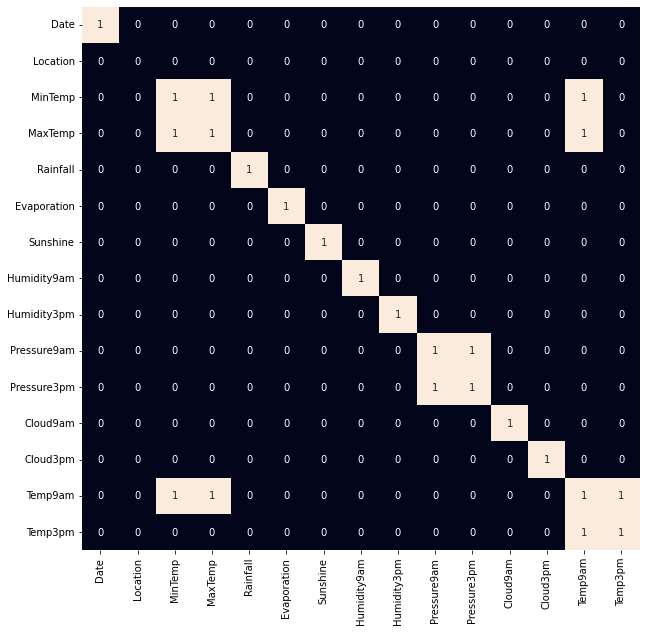

In [18]:
#visualization of corelation between columns. 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [19]:
#display the shape of our dataframe(rows and columns)
df.shape

(3337, 17)

VISUALIZATION

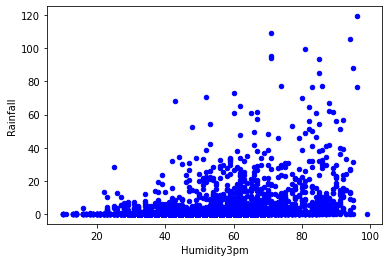

In [20]:
# gca stands for 'get current axis'
ax = plt.gca()


df.plot(kind='scatter',x='Humidity3pm',y='Rainfall', color='blue', ax=ax)

plt.show()



<AxesSubplot:xlabel='RainToday', ylabel='count'>

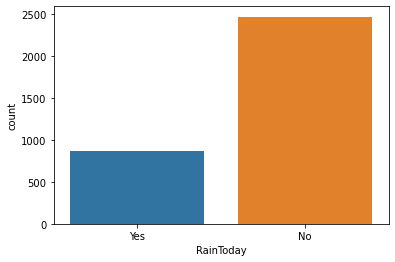

In [21]:
sns.countplot(x="RainToday",data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

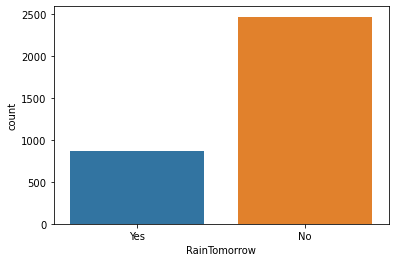

In [22]:
sns.countplot(x="RainTomorrow",data=df)

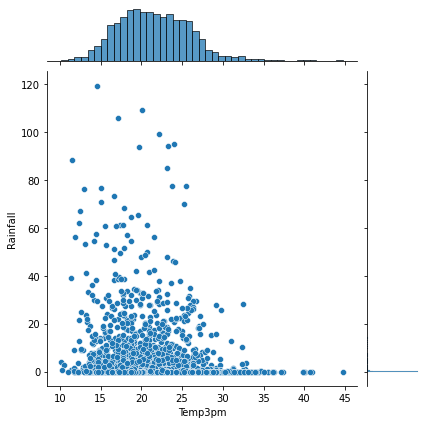

In [23]:
sns.jointplot(x='Temp3pm',y='Rainfall',data=df)

OUTLIER TREATMENT

In [24]:
#Outlier treatment of Rainfall column
#Rainfall column contain outlier as there is a huge difference in 75% and max value.
#from the above graph we see Rainfall has outlier

lv=np.percentile(df.Rainfall,[99])[0]
df[(df.Rainfall<lv)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,212008.0,1,19.5,19.5,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,222008.0,1,19.5,19.5,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,232008.0,1,21.6,21.6,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,242008.0,1,20.2,20.2,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
5,262008.0,1,20.2,20.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,6212017.0,1,8.6,8.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,6222017.0,1,9.3,9.3,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,6232017.0,1,9.4,9.4,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,6242017.0,1,10.1,10.1,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [25]:
df.Rainfall[(df.Rainfall<0.3*lv)]=0.3*lv

C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_6032\72025996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall<0.3*lv)]=0.3*lv


Dummy variable creation

In [26]:
#As there are are two categorical(RainToday & RainTomorrow) value we have to create two dummy variable.
df=pd.get_dummies(df,columns=["RainToday"],drop_first=True)

In [27]:
df=pd.get_dummies(df,columns=["RainTomorrow"],drop_first=True)

In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,212008.0,1,19.5,19.5,15.6888,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,222008.0,1,19.5,19.5,15.6888,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,232008.0,1,21.6,21.6,15.6888,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,242008.0,1,20.2,20.2,18.8000,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,252008.0,1,19.7,19.7,77.4000,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


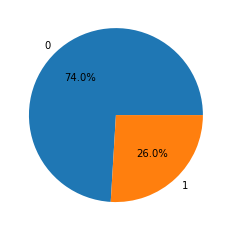

In [29]:
#visualizing the RainToday column where 0 denotes no and 1 denotes yes.
#Here we see there is only 26% chance of rain Today.

import matplotlib.pyplot as plt
plt.pie(df['RainToday_Yes'].value_counts().values,
        labels = df['RainToday_Yes'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

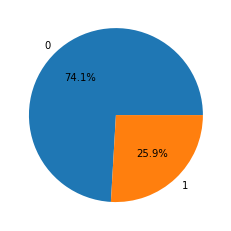

In [30]:
#visualizing the RainTomorrow column where 0 denotes no and 1 denotes yes.
#Here we see there is only 25.9% chance of rain Today.

import matplotlib.pyplot as plt
plt.pie(df['RainTomorrow_Yes'].value_counts().values,
        labels = df['RainTomorrow_Yes'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

MODEL-1

CLASSIFICATION TREE

In [31]:
#split data into dependent and Indepent variable(A is independent vriable while B is dependent variable)
A=df.loc[:,df.columns!='RainTomorrow_Yes']
B=df['RainTomorrow_Yes']

In [32]:
#showing the 1st five rows of independent variable
A.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,212008.0,1,19.5,19.5,15.6888,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1
1,222008.0,1,19.5,19.5,15.6888,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1
2,232008.0,1,21.6,21.6,15.6888,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1
3,242008.0,1,20.2,20.2,18.8000,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1
4,252008.0,1,19.7,19.7,77.4000,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1


In [33]:
#showing the 1st 5 rows of dependent variable
B.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

In [34]:
#apply shape function to find the shape of both the variables

A.shape,B.shape

((3337, 16), (3337,))

TRAIN-TEST-SPLIT

In [35]:
#apply train_test_split function to split the data into 2 train set and 2 test set of both variables.

from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.2,random_state=0)

In [36]:
#apply shape function to find the shape of train set of both variables.

A_train.shape,B_train.shape

((2669, 16), (2669,))

In [37]:
#apply shape function for finding the test size of both variables.

A_test.shape,B_test.shape

((668, 16), (668,))

TRAINING REGRESSION TREE

In [38]:
#import library and create a model

from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=2)

In [39]:
#fit the model
clftree.fit(A_train,B_train)

DecisionTreeClassifier(max_depth=2)

In [40]:
#predict value using trained model

B_train_pred=clftree.predict(A_train)
B_test_pred=clftree.predict(A_test)

In [41]:
B_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

MODEL PERFORMANCE

In [42]:
#import accuracy prediction libreay like confusion matrix and accruacy score

from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
#calculate confusion matrix for training set
confusion_matrix(B_train,B_train_pred)

array([[1893,   69],
       [ 412,  295]], dtype=int64)

In [44]:
#calculate confusion matrix for test set
confusion_matrix(B_test,B_test_pred)

array([[488,  22],
       [100,  58]], dtype=int64)

ACCURACY PREDICTION

In [45]:
#predict accuracy of the model using train data
accuracy_score(B_train,B_train_pred)

0.8197826901461222

In [46]:
#predict accuracy of the model using test data
accuracy_score(B_test,B_test_pred)

0.8173652694610778

PLOTTING CLASSIFICATION TREE

In [47]:
dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=A_train.columns,filled=True)

In [58]:
#loading the tree constructing librery
from IPython.display import Image
import pydotplus

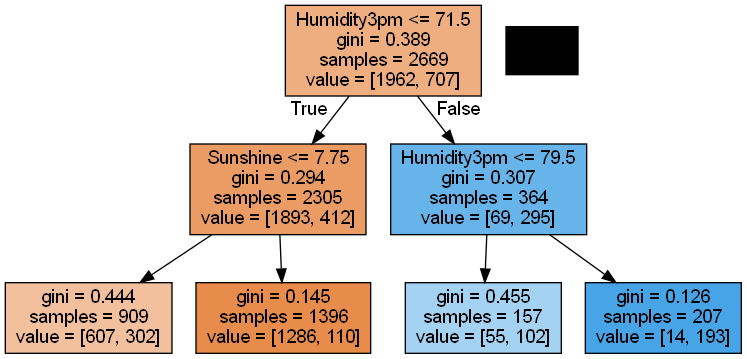

In [59]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

CONTROLLING TREE GROWTH

#create another model by specifying hyper parameter.
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
clftree2.fit(A_train,B_train)

In [61]:
dot_data=tree.export_graphviz(clftree2,out_file=None,feature_names=A_train.columns,filled=True)


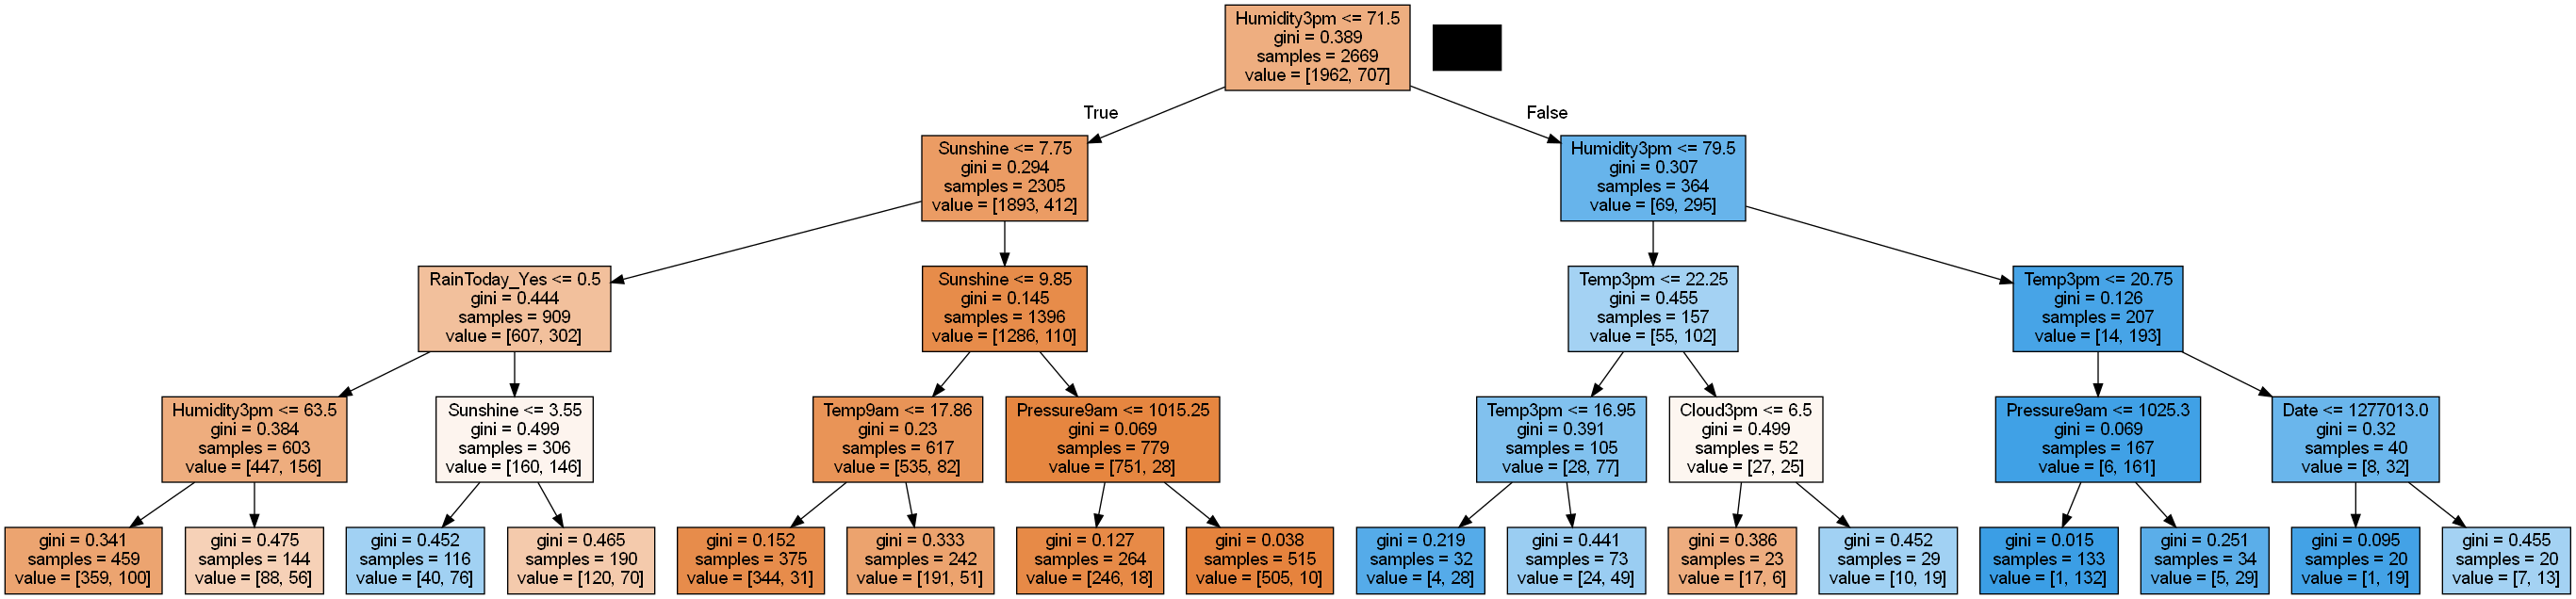

In [78]:
#create tree using dot_data 
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

ACCURACY PREDICTION

In [79]:
#classification model2 accuracy
accuracy_score(B_test,clftree2.predict(A_test))

0.8353293413173652

ENSEMBLE TECHNIQUES:-

The problem with normal decision tree is high varieance that why we use ensemble techniques

(A)BAGGING

In [80]:
#bagging is uesd to reduce the varience of a decision tree.
#Bagging used to combine multiple models to improve performance and to increase the diversity of the model.
#It helps to reduce overlifting by aggregating multiples model.

#import tree library
from sklearn import tree

In [81]:
#create a tree object
clftree=tree.DecisionTreeClassifier()

In [82]:
#importing bagging library
from sklearn.ensemble import BaggingClassifier

OBJECT CREATED

In [83]:
#create a bagging model
bag_clf=BaggingClassifier(base_estimator=clftree,n_jobs=-1,random_state=42)

TRAIN AND FIT MODEL

In [84]:
#train the bagging model using training data
bag_clf.fit(A_train,B_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=-1,
                  random_state=42)

CONFUSION MATRIX

In [85]:
#calculate confusion matrix
confusion_matrix(B_test,bag_clf.predict(A_test))

array([[474,  36],
       [ 77,  81]], dtype=int64)

ACCURACY PREDICTION

In [86]:
#calculate accuracy score using train data
accuracy_score(B_train,bag_clf.predict(A_train))

0.9846384413638066

In [87]:
#calculate accuracy score using test data
accuracy_score(B_test,bag_clf.predict(A_test))

0.8308383233532934

(B)RANDOM FOREST

In [88]:
#The disadvantage of bagging tree is it created corelated tree and the models are similar 
# so we use subset of predictors variables so that we get different splits in each models.
# random forest makes the random selection of features rather then using all features to develop tree.


#import library
from sklearn.ensemble import RandomForestClassifier

OBJECT CREATED AND FIT MODEL

In [89]:
#create a random forest object
rf_clf=RandomForestClassifier(n_jobs=-1,random_state=42)

In [90]:
#fitting and training the object using training data set
rf_clf.fit(A_train,B_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

CONFUSION MATRIX

In [91]:
#calculate the confusion matrix
confusion_matrix(B_test,rf_clf.predict(A_test))

array([[479,  31],
       [ 73,  85]], dtype=int64)

ACCURACY PREDICTION

In [94]:
#calculate the accuracy score
accuracy_score(B_test,rf_clf.predict(A_test))

0.844311377245509

(C)BOOSTING

boosting is another ensemble procedure to make a collection of predictors. The process of turning a weak learer into a strong learner.There are three types of Boosting.The objective is to solve net error from the prior trees.

1-gradient boosting

2-ada boostong

3-XG booosting

(1)Gradient Boosting:-
it can optimize any differentiable loss function.It support different loss function.It works well with intraction.

In [95]:
#loading gradient boosting library
from sklearn.ensemble import GradientBoostingClassifier

CREATE OBJECT AND FIT THE MODEL

In [97]:
#create a gradient booting object
gbc_clf=GradientBoostingClassifier()

In [98]:
#fit the gradient boosting object
gbc_clf.fit(A_train,B_train)

GradientBoostingClassifier()

ACCURACY

In [100]:
#predict accuracy
accuracy_score(B_test,gbc_clf.predict(A_test))

0.8413173652694611

CREATE ANOTHER MODEL WITH HYPERPARAMETER

In [102]:
#create another object for better performance of the model
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=2)

In [103]:
#fit the model
gbc_clf2.fit(A_train,B_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=2, n_estimators=1000)

ACCURACY PREDICTION

In [104]:
#find accuracy
accuracy_score(B_test,gbc_clf2.predict(A_test))

0.8383233532934131

(2)ADA BOOST:-

it minimises loss function related to any classification error.

In [108]:
#importing library
from sklearn.ensemble import AdaBoostClassifier

OBJECT CREATED AND FIT THE MODEL

In [109]:
#make a ada boost object
ada_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [110]:
#fit & train the model
ada_clf.fit(A_train,B_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

ACCURACY

In [111]:
#calculate accuracy
accuracy_score(B_test,ada_clf.predict(A_test))

0.8353293413173652

ANOTHER OBJECT CREATED WITH LESS LEARNING RATE

In [112]:
#create another object of Ada boost for specifying hyper parameter and increases model's learning rate
ada_clf2=AdaBoostClassifier(learning_rate=0.05,n_estimators=500)

In [113]:
#fit and train the model
ada_clf2.fit(A_train,B_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=500)

PREDICT ACCURACY

In [114]:
#predict accuracy
accuracy_score(B_train,ada_clf2.predict(A_train))

0.8433870363431997

In [115]:
#predict accuracy
accuracy_score(B_test,ada_clf2.predict(A_test))

0.8383233532934131

(3)XG BOOST:-

excecution speed of this model is fast as compaired to other ensemble technique and generally it has better accuracy.
It trains multiple decision trees and then combines the results.it allows models to learn quickly.

In [116]:
#import xg boost library
import xgboost as xgb

TRAIN & FIT THE MODEL

In [117]:
#create xg boost object
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [118]:
#fit and train the object
xgb_clf.fit(A_train,B_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

ACCURACY

In [119]:
#accuracy
accuracy_score(B_test,xgb_clf.predict(A_test))

0.844311377245509

VISUALIZATION

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

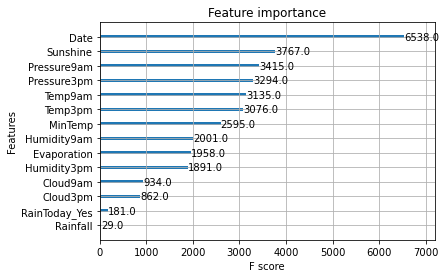

In [120]:
#plot XGB with its features
xgb.plot_importance(xgb_clf)

OBJECT CREATED WITH LESS LEARNING RATE

In [122]:
#create another object by changing the hyper parameter
xgb_clf=xgb.XGBClassifier(n_estimators=500,learning_rate=0.1,random_state=42)

In [123]:
param_test={
    'max_depth':range(3,10,2),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2,0.1,1]
}

In [124]:
#load gridsearch library and create a gridseach object(as XG boost works better with gridsearch)
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(xgb_clf,param_test,n_jobs=-1,cv=5,scoring='accuracy')

FIT AND TRAIN THE MODEL

In [125]:
#fit and train the object
grid_search.fit(A_train,B_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [127]:
cvxg_clf=grid_search.best_estimator_

ACCURACY PREDICTION

In [128]:
#predict accuracy using training data
accuracy_score(B_train,cvxg_clf.predict(A_train))

1.0

In [129]:
#predict accuracy using training data
accuracy_score(B_test,cvxg_clf.predict(A_test))

0.8473053892215568

In [130]:
#find the best values of hyperparameter where the model give its best accuracy.
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.8}

PROJECT QUESTIONS


1- YOUR VIEW ABOUT PROBLEM STATEMENT ?

The objective of the project is we have to create a Machine Learning model using various Classification Models to predict rainfall. But before that let's talk about the company who gave us the task for us. The Daily Buzz was founded many years ago by a group of journalists and it is a newspaper company. The company believed in a strong, independent newspaper that was vital to the health and well-being of any community. As the newspaper provides high-quality news to the people it can gain popularity. They were well-known for their interesting articles and local news coverage. After all this, they were struggling to attract more readers. To resolve this issue they make a column on weather forecasting in the newspaper where they would predict the weather for the coming days. The editor handpicked a team of experienced meteorologists to work on the new column. They were equipped with state-of-the-art technology and the latest weather forecasting tools. The team worked tirelessly to provide accurate and reliable predictions.

The first edition of "The Weather Oracle" was published. The column included detailed predictions for the week ahead, including the temperature, humidity, and chances of precipitation. The editor-in-chief of The Daily Buzz realized that they could further improve the accuracy of their weather predictions. With this in mind, they decided to hire a machine-learning expert to create a machine-learning model for rainfall prediction. The Editor wants ML engineers to use Ensemble methods to get the best accuracy.

Classification techniques such as decision tree classifiers and ensemble methods can be useful in predicting the weather. Weather prediction involves analyzing various factors such as temperature, humidity, wind speed, precipitation, and pressure, among others. These factors can be used as input features for building classification models.

A decision tree classifier is a type of supervised learning algorithm that can be used to predict the weather. It works by recursively splitting the data into subsets based on the most significant input feature, which helps to create a tree-like structure. Each internal node of the tree represents a test on an input feature, and each leaf node represents a prediction. The decision tree classifier can be trained on historical weather data, and once the tree is constructed, it can be used to predict future weather conditions.

Ensemble methods, on the other hand, combine multiple classification models to improve the accuracy of predictions. Random Forest is an example of an ensemble method that can be used to predict the weather. It combines multiple decision trees and uses bagging (bootstrap aggregating) to improve the accuracy of the predictions. In other words, it creates multiple decision trees using different subsets of the data and then averages the predictions to produce a final prediction.

As an ML expert at The Daily Buzz, the company was given the task to create an ML model to predict rainfall. So, we have to create a Machine Learning Model using various Classification Models including Decision Trees and Ensemble methods and compare the accuracy of each model.

2-WHAT WILL BE YOUR APPROACH TO SOLVING THIS TASK?

This is a weather prediction problem where we basically find out the rainfall status which is affected by many independent factors like humidity, pressure, cloud, tempreture, evaporation etc. This is a classification problem that is solved using classification tree and ensemble technique. This model is implemented by using the following steps such as:-

(Model 1) Classification Tree:- 

(1) Import all required libraries 

(2) Load data 

(3) Perform EDA 

(4) Visualize data 

(5) Prepare data 

(6) Split data into training and testing 

(7)Trainning Classification tree 

(8) Plotting Classification tree 

(9) Controlling tree growth 

(10) Model performance.

1. Importing all libraries and load data:- 
First of all import all the required libraries like pandas, NumPy, seaborn, scikit-learn etc. And load the data (sydney_rain-prediction.csv file) to train the model and test the model by showing the top five rows of the file. Data stores features:- Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow etc. I changed the Date column into string format as it was in date format, after that I removed the special character from the Date column and again converted into a float column. Likewise I chnaged the location column from object to integer column by replace method.


2. Perform EDA:- 
Now perform an Exploratory Data Analysis. In Exploratory Data Analysis, firstly we check if there are Null values present or not. In this data there are 17 columns and 14 columns conatin null values. To remove the null value I filled the null value with mean of that column. Then I checked the information of the data, then describe the data which shows the mean value, standard deviation value, minimum value, maximum value. By using corr() method I found out the correlation between the columns. I found out a outlier in Rainfall, so that can be treated with lower value formula.


3. Visualization:- 
Now visualize the data Rainfall and Humidity using a joint plot. Similarly other factors like pressure, cloud, temperature also visualize using the jointplot. I used count plot for categorical data like rainToday and RainTomorrow. I used a color scaled graph to visualize the correlation between the columns. For categorical data I used a pie chart for both Raintoday and RainTomorrow column.


4. Prepare Data :- 
Now it's time to prepare the data and divide the data into the independent and dependent features. A stores the independent feature and B stores the dependent feature for univariate analysis. For multi variate analysis I used all the column except RainTomorrow column as X and for y I've used RainTomorrow column as it is a dependent variable.


5. Split data into training and testing:- 
Split the data into the training and testing data using the train_test_split function which takes some of the parameters like A, B, random_state, test_size. A is an independent feature and B is the dependent feature. RandomState is used for randomly selecting the data, and test size used for dividing the data into the training and testing. Example: if test_size is 20% then automatically training size is 80%. train_test_split function return four parameters. They are A_train, A_test, B_train, B_test. A_train stores the independent feature and B_train stores the dependent feature and both A_train and B_train are used for training the model. A_test stores the independent feature and B_test stores the dependent feature and both A_test and B_test are used for testing the model and evaluating the model.


6. Define model:- 
Now define the ClassificationTree model with default parameters and trained ClassificationTree model with training data (A_train and B_train ). And test the model using the testing data (A_test) and display the predicted and actual data.


7. Plotting Classification tree:- 
Import the pydotplus and image library and create classification tree.

8. Controlling tree growth:- 
Here I created another object for classification tree with specifying min_sample_leaf and max_depth to the classification tree.

9. Check accuracy:- 
Check the accuracy of the model which is approximately 80% before controlling the tree and after specifying min_sample_leaf and max_depth the accuracy become 81% accurate on the testing data .

MODEL-2(Ensemble Technique)

The problem with normal decision tree is high variance that's why we use ensemble technique. That's why I used 3 ensemble techniques named as Bagging, Random Forest, and Boosting.

Bagging:-

Consider there are n observations and m features in the training set. You need to select a random sample from the training dataset without replacement. A subset of m features is chosen randomly to create a model using sample observation. The feature offering the best split out of the lot is used to split the nodes. The tree is grown, so you have the best root nodes. The above steps are repeated n times. It aggregates the output of individual decision trees to give the best prediction.

(1)load library(2)create objectand fit the model(3)predict accuracy

Random Forest:-

Select random samples from a given data or training set. This algorithm will construct a decision tree for every training data. Voting will take place by averaging the decision tree. Finally, select the most voted prediction result as the final prediction result.

(1)load library(2)create objectand fit the model(3)predict accuracy

Boosting:-

The base algorithm reads the data and assigns equal weight to each sample observation. False predictions made by the base learner are identified. In the next iteration, these false predictions are assigned to the next base learner with a higher weightage on these incorrect predictions. Repeat step 2 until the algorithm can correctly classify the output. The main aim of Boosting is to focus more on mis-classified predictions.

(1)load library(2)create objectand fit the model(3)predict accuracy(4)create another object with less learning rate(5)fit the model(6)predict accuracy

3-WHAT WERE THE AVAILABLE ML MODEL OPTIONS YOU HAD TO PERFORM THIS TASK?

This is a RainFall prediction problem so basically it can be solved using classification, ensemble and regression technique. Regression Algorithms are used with continuous data. Classification Algorithms are used with discrete data. In Regression, we try to find the best fit line, which can predict the output more accurately. In Classification, we try to find the decision boundary, which can divide the dataset into different classes. Ensemble models are a machine learning approach to combine multiple other models in the prediction process. These models are referred to as base estimators. Ensemble models offer a solution to overcome the technical challenges of building a single estimator. Each type has its own importance on different scenarios, but at the core, all the regression methods analyze the effect of the independent variable on dependent variables. Here we are discussing some important types of machine learning models which are other model for Rainfall prediction given below:

(1)Multivariate linear regression

(2)Random Forest

(3)XG Boost gradient descent

(4)Logistic Regression

(5)Decision Tree

(6)K-Nearest Neighbor (K-NN)

(7)Support Vector Machine(SVM)

1-Multivariate linear regression (MLR)

Linear regression can be multivariate which has multiple independent variables used as input features and simple linear regression which has only one independent or input feature. Both linear regressions have one dependent variable which can be forecasted or predicted based on the input features. This paper presented the multivariate linear regression because multiple environmental variables or features were used to predict the dependent variable called daily rainfall amount. Linear regression is a supervised machine learning technique used to predict the unknown daily rainfall amount using the known environmental variables. The multivariate linear regression used multiple explanatory or independent variables (X) and single dependent or output variable denoted by Y. The size of the data set collected from the meteorological station for this study was appropriate to use the machine learning algorithms called multivariate linear regression that can estimate the daily amount of rainfall in the region. This algorithm can show how strongly each environmental variable influences the intensity of the daily rainfall.

2-Random forest (RF)

A Random Forest Regression model is powerful and accurate. It usually performs great on many problems, including features with non-linear relationships. Random forest regression is a supervised machine learning algorithm that uses the ensemble learning method for regression. RF works by building several decision trees during training time and outputting the mean of the classes as the prediction of all the trees. The RF algorithm works on the following steps: a.Take at random p data points from the training set. b.Build a decision tree associated with these p data points. c.Take the number N of trees to build and repeat a and b steps. d.For a new data point, make each one of the N tree trees predict the value of y for the data point and assign the new data point to the average of all of the predicted y values. Random forest algorithm is one of the supervised machine learning algorithms that are selected as the predictive model for daily rainfall prediction using environmental input variables or features. Random forest regression is operated by constructing a multitude of decision trees at the training time and outputting the class that is the mode of mean prediction or regression of the individual trees. According to the RF algorithm, it is efficient for large datasets and a good experimental result is obtained using large datasets having a large proportion of the data is missing.

3-XGBoost gradient descent

XGBoost stands for eXtreme Gradient Boosting. It is a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model. XGBoost is implemented for the supervised machine learning problem that has data with multiple features of xi to predict a target variable yi. Most authors use XGBoost for different regression and classification problems due to the speed and prediction accuracy of the algorithm. Extreme Gradient Boosting (XGBoost) is one of the efficient algorithms in the gradient descant that has a linear model algorithm and tree learning algorithm. It is faster than other gradient descent algorithms because of the parallel computation on a single machine. This paper chooses the XGBoosting algorithm for experiments to predict the target variable daily rainfall intensity using various input or dependent environmental variables. XGBoost is a powerful algorithm that is fast learning through parallel and distributed computing and offers efficient memory usage that produces a robust solution.

4-Logistic Regression:-

Logistic regression allows one to predict a discrete outcome, such as whether it will rain today or not from a set of variables that may be continuous, discrete, discontinuous, or mix of any of these. Generally, the dependent or response variable is discontinuous, such as presence/absence or success/failure, i.e., the dependent variable can take the value 0 or 1 with a probability of failure or success. This type of variable is called a Bernoulli (or binary) variable. Although not as common and not discussed in this paper, applications of logistic regression have also been extended to cases where the dependent variable is of more than two cases, known as multinomial or polytomous regression.

5-Decision Tree:

This classification algorithm that works on categorical as well as numerical data is a Decision tree algorithm. It creates tree-like structures and is very easy to implement, analyse the data in tree-shaped graph.This algorithm helps in splitting the data into two or more related sets based on the most important indicators. First, we calculate the entropy of each attribute and then the data is divided, with predictors having maximum information gain or minimum entropy: The results obtained are easier to read and interpret. This algorithm has higher accuracy in comparison to other algorithms as it analyses the dataset in the tree-like graph. Accuracy: It is the ratio of number of correct outputs to the total number of input samples. Precision: It is the number of correct positive correct results divided by the number of positive results predicted by the classifiers.

6-K-Nearest Neighbor (K-NN): K-Nearest Neighbor is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm considers the similarity between the new case/data and available cases and put the new case into the category that is mostly related to the available categories. It classifies object dependent on nearest neighbor. It groups the named points and uses them on how to mark another point. The similar data is clustered and it is possible to fill the null values of data using K-NN. As soon as these missing values are filled, we apply ML techniques to the data set. It's possible to obtain better accuracy by utilizing various combinations of these algorithms.

7-Support Vector Machine: Support Vector Machine is a supervised learning algorithm which can be used for regression as well as classification problems. So if we use it for classification problems, then it is termed as Support Vector classification. Support Vector is an algorithm which works for continuous as well as categorical variables.

Kernel: It is a function used to map a lower-dimensional data into higher dimensional data. Hyperplane: In general SVM, it is a separation line between two classes, but in SVR, it is a line which helps to predict the continuous variables and cover most of the datapoints. Boundary line: Boundary lines are the two lines apart from hyperplane, which creates a margin for datapoints. Support vectors: Support vectors are the datapoints which are nearest to the hyperplane and opposite class.

In SVR, we always try to determine a hyperplane with a maximum margin, so that maximum number of datapoints are covered in that margin. The main goal of SVR is to consider the maximum datapoints within the boundary lines and the hyperplane (best-fit line) must contain a maximum number of datapoints.


4-WHICH MODEL'S PERFORMANCE IS BEST AND WHAT COULD BE THE POSSIBLE REASON FOR THAT?

Rainfall prediction is one of the challenging tasks in weather forecasting process. Accurate rainfall prediction is now more 
difficult than before due to the extreme climate variations. Machine learning techniques can predict rainfall by extracting 
hidden patterns from historical weather data. Selection of an appropriate classification technique for prediction is a difficult
job.I used different machine learning model to find the best accuracy of the model.

Although Rainfall prediction can be sovled by both regression and classification technique but the newpaper company"The Daily 
Buzz" is basically uses classification and ensemble technique to find the rainfall prediction of the city.Based on that i used 
classification technique such as classification tree and ensemble technique such as Boosting,Bagging and random Forest is used 
for my machine learning model.In esemble technique i used three sub method of boosting technique such as Gradient boosting,Ada boosting,XG Boosting.
so let's come to our model performances,Classification tree give an accuracy of 81% ,bagging technique 83%,Random forest 84.13%,gradient boosting 84%,Ada boosting 83%,XG boost 84.58% .Random forest also perform well but we clearly see that XG boost perform well with our test data set and it gives the highest accuracy of our model i.e 84.58%.

There are so many reason for which the model perform well some of them are listed below.

Speed :– 
All algorithms are efficient in their training due to the ability to utilize multiple CPU cores for parallel operations. The training speed largely depends on the hyper-parameters, i.e., the number of learners, tree depth, etc., and the training data size.Since gradient of the data is considered for each tree, the calculation is faster and the precision is accurate than Random Forest.

‍Accuracy and Overfitting :–
 The accuracy of XG Boost model is highest i.e 84.58% whereas other models have less accuracy for example classification tree has 82%,bagging has 83%,Random Forest has 84%,gradient boosting has 83%,ada boosting has 83%. The RF algorithm has high accuracy. However, the high accuracy came at the cost of over-fitting, causing the model to display poor performance in real-world scenarios. RFs tend to overfit when the sampled data presents similar data points to each tree. Developers can counter overfitting by pre-processing and cleaning the data, but the challenge remains for real-time use cases.
The XGBoost algorithm does not construct trees to their full depth. It prunes trees at a certain point depending on the node's similarity score. It considers the “Gain” of a node as the difference between the similarity score of the node and its children and stops building the tree if the score is considered minimal. The smaller trees counter the overfitting problem and allow the model to generalize better. Countering overfitting means XGBoost models show better accuracies on test data making them better suited for real problems.XGBoost does not account for the number of leaves present in the algorithm. If the model predictability is not good, the algorithm performs better with more leaves in the decision tree. This improves the bias and the results completely depends on the data present in the algorithm.

‍Hyperparameter Tuning :–
XGBoost is a significantly complex algorithm compared to other and involves several parameters that can alter the performance.The hyperparameters for XGBoost are set only for the first tree. The rest of the trees adjust themselves with every iteration using the loss of the preceding tree and carrying out gradient descent. This is beneficial in cases where the input data is real-time and displays high variation. A model whose parameters adjust itself iteratively (XGBoost) will learn better from streaming data than one with a fixed set of parameters for the entire ensemble (Random Forest).

‍Working With Unbalanced Data :–
The XGBoost model performs better than any other model, when we have a class imbalance. The boosting algorithm iteratively learns from the mistakes of the previous tree. So if a tree fails to predict a class (most likely the imbalanced class), the proceeding tree will give more weightage to this sample. Intuitively, this attempts to equalize the model by giving more weightage to less represented categories. The other algorithm does not have any such mechanism to handle data imbalance.XGBoost builds one tree at a time so that each data pertaining to the decision tree is taken into account and the data is filled if there are any missing data. This helps developers to work with gradient algorithms along with the decision tree algorithm for better results.With accurate results, XGBoost is hard to work with if there are lots of noise. Also, it is hard to tune as well. If the data is real-time so the data is unbalanced, we can use XGBoost where it performs exceptionally well.

Minimal loss function:-
XGBoost helps in numerical optimization where the loss function of the data is minimized with the help of weak learners so that iteration happens in the local function in a differentiable manner. Sample is not modified here but different levels of importance are given to each feature in the data. Random Forest is mostly a bagging technique where various subsets are considered and an average of each subset is calculated. Either random subset of features or bootstrap samples of data is taken for each experiment in the data.

WHAT STEPS CAN YOU TAKE TO IMPOROVE THIS SELECTED MODEL'S PERFORMANCE EVEN FORTHER?

Extreme gradient boosting, or XGBoost, is an efficient open-source implementation of the gradient boosting algorithm. This method is popular for classification and regression problems using tabular datasets because of its execution speed and model performance. But the XGBoost training process can be time consuming.

General Approach for Improving Model performance

(1)Parameter Tuning

(2)Tree method (gpu_hist)

(3) Cloud training

(4)Distributed XGBoost on Ray

(1)Parameter Tuning:- Choose a relatively high learning rate. Generally, a learning rate of 0.1 works, but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required. Tune tree-specific parameters (max_depth, min_child_weight, gamma, subsample, colsample_bytree) for the decided learning rate and the number of trees. Note that we can choose different parameters to define a tree, and I’ll take up an example here. Tune regularization parameters (lambda, alpha) for xgboost, which can help reduce model complexity and enhance performance. Lower the learning rate and decide the optimal parameters.

(2)Tree method:-

The tree method parameter sets the algorithm used by XGBoost to build boosted trees. By default, an approx algorithm is used, which doesn’t offer the best performance. Switching to the hist algorithm improves performance. However, because both of those algorithms only use the central processing unit (CPU), neither offers outstanding performance overall. By enabling the gpu_hist algorithm, you can train your XGBoost using the graphics processing unit (GPU). This is because running models on the GPU can save a great deal of time compared to running them on the CPU. Note that when training XGBoost, you can set the depth to which the tree may grow. Bigger trees can be better model complex interactions between features, but if they are too deep, they may cause overfitting. Bigger trees also take longer to train. There are also multiple other hyperparameters that control the training process. Finding the best set of hyperparameters for your problem should be automated with a tool like HyperOpt, Optuna, or Ray Tune.

(3)The cloud:-

Tweaking the tree method is ideal for using our local GPUs to train XGBoost models, but other ways can be more effective. The solution hides in the cloud. Cloud computing allows us to access much more powerful GPUs and in greater numbers than we have available locally. However, this comes at a cost. These cloud GPU providers aren’t free, but there are options for training on powerful GPUs, such as the pay-as-you-go solution. This gives you the right to shut down training instances when you finish training, meaning you only pay when you’re using them.

(4)Distributed XGBoost training with Ray:-

It’s possible to speed up the training of XGBoost on a large dataset by either using a GPU-enabled tree method or a cloud-hosted solution like AWS or Google Cloud. In addition to these two options, there’s a third — and better — solution: distributed XGBoost on Ray, or XGBoost-Ray for short. XGBoost-Ray is a distributed learning Python library for XGBoost, built on a distributed computing framework called Ray. XGBoost-Ray allows the effortless distribution of training in a cluster with hundreds of nodes. It also provides various advanced features, such as fault tolerance, elastic training, and integration with Ray Tune for hyperparameter optimization. The default implementation of XGBoost can only use one GPU and CPU on a single machine. In order to leverage more resources, it’s necessary to use a distributed training method like XGBoost-Ray. Furthermore, if you are working with datasets that are too big to fit in memory of a single machine, distributed training is necessary.
